<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#Creating-Feature-Matrix" data-toc-modified-id="Creating-Feature-Matrix-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating Feature Matrix</a></span></li><li><span><a href="#Splitting-the-dataset-into-Training-and-Testing-set" data-toc-modified-id="Splitting-the-dataset-into-Training-and-Testing-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Splitting the dataset into Training and Testing set</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Fitting-SVM-to-the-Training-Set" data-toc-modified-id="Fitting-SVM-to-the-Training-Set-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fitting SVM to the Training Set</a></span></li><li><span><a href="#Predictiong-the-Test-Results" data-toc-modified-id="Predictiong-the-Test-Results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Predictiong the Test Results</a></span></li><li><span><a href="#Making-a-confusion-matrix-for-better-look-at-the-results." data-toc-modified-id="Making-a-confusion-matrix-for-better-look-at-the-results.-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Making a confusion matrix for better look at the results.</a></span></li><li><span><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Visualizing the results</a></span><ul class="toc-item"><li><span><a href="#Training-Set-Results" data-toc-modified-id="Training-Set-Results-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Training Set Results</a></span></li><li><span><a href="#Test-Set-Results" data-toc-modified-id="Test-Set-Results-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Test Set Results</a></span></li></ul></li></ul></li><li><span><a href="#Kernel-Support-Vector-Machine-(SVM)" data-toc-modified-id="Kernel-Support-Vector-Machine-(SVM)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kernel Support Vector Machine (SVM)</a></span></li></ul></div>

# Support Vector Machine

“**Support Vector Machine**” (SVM) is a `supervised` machine learning algorithm which can be used for both `classification` or `regression` challenges. 

However,  it is mostly used in `classification` problems. In this algorithm, we plot each data item as a point in 
n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 

Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

from matplotlib.colors import ListedColormap

from sklearn.svm import SVC


* A car company has set up a price for SUV which is very high
* We want to see who will purchase the SUV

In [2]:
dataset = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Udemy Course/Part 3 - Classification/3. Support Vector Machine (SVM)/Social_Network_Ads.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Creating Feature Matrix

In [4]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [6]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [7]:
y.size

400

## Splitting the dataset into Training and Testing set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [12]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

## Fitting SVM to the Training Set

In [11]:
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Predictiong the Test Results

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
print('Variance score: %.2f' % r2_score(y_test, y_pred)) # This score tells the fit of the model.

Variance score: 0.54


In [14]:
classifier.score(X_train, y_train)

0.82333333333333336

## Making a confusion matrix for better look at the results.

In [15]:
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

# 8 + 2 : incorrect predictions
# 90 : correct predictions over 100 observations.

array([[66,  2],
       [ 8, 24]])

In [18]:
print("Accuracy score: %.2f" % accuracy_score(y_test, y_pred))

Accuracy score: 0.90


## Visualizing the results

### Training Set Results

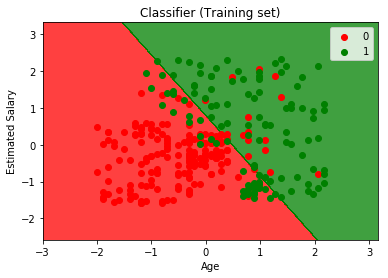

In [26]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
    
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test Set Results

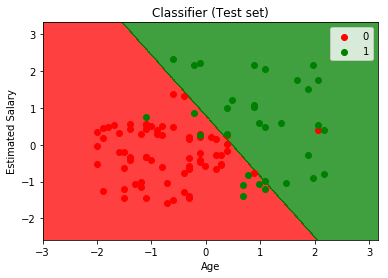

In [27]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

____

# Kernel Support Vector Machine (SVM)